In [15]:
# import necessary functions #
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import xarray as xr
from scipy.interpolate import CubicSpline

from pathlib import Path

In [16]:
# get detrend function from q2 #
c02_detrend = data
c02_detrend['c02'] = data['c02'].sub(data.groupby('year')['c02'].transform('mean'))

monthly_anomaly = c02_detrend.groupby('month').mean()[['c02']]
monthly_anomaly

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


Text(0.5, 1.0, 'Seasonal Anomaly')

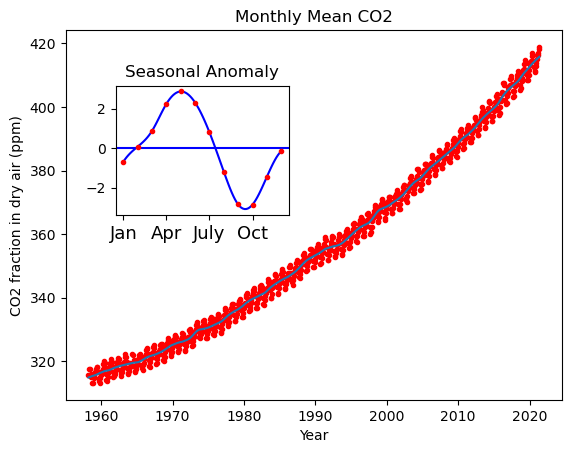

In [19]:
# plot keeling curve from lecture #
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

# plot seasonal anomaly using cubicspline #
axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
axin1.axhline(0, color="b")

c02anomaly = monthly_anomaly.c02
c02anomalyindex = monthly_anomaly.index
splined = CubicSpline(c02anomalyindex, c02anomaly)
linspace = np.linspace(1, 12, 100)

axin1.plot(linspace, splined(linspace), color="b")
axin1.plot(c02anomaly, "r.")
axin1.set_xticks([1, 4, 7, 10])
axin1.set_xticklabels(["Jan", "Apr", "July", "Oct"], size=13)
axin1.set_title("Seasonal Anomaly")